<div align=center>
		
<font size=5>
In the Name of God
<font/>
<p></p>
<br/>
<br/>
<font color=#FF7500>
Sharif University of Technology - Departmenet of Computer Engineering
</font>
<p></p>
<font color=blue>
Artifical Intelligence - Dr. Mahdieh Soleimani
</font>
<br/>
<br/>
Fall 2022

<hr/>
<font color=red>
Local Search Practical Assignment (30 + 10 points)
</font>
</div>

<ul>
  <li>Some cell's outputs have not been deleted. you can use these to make sure your implementation is correct.</li>
</ul>

In this assignment you will solve the traveling salesman problem using hill climbing, simulated annealing and genetic algorithms.

In [1]:
# do not import other packages for this assignment
import matplotlib.pyplot as plt
import numpy as np

The traveling salesperson problem (TSP) is a touring problem in which each city must be visited exactly once. The aim is to find the shortest tour. The problem is known to be NP-hard, but an enormous amount of effort has been expended to improve the capabilities of TSP algorithms. In addition to planning trips for traveling salespersons, these algorithms have been used for tasks such as planning movements of automatic circuit-board drills and of stocking machines on shop floors.

In this notebook we will use matplotlib library to visualize the problem. we represent each city as a point in a 800*800 rectnagle. the positions of the cities are randomly chosen. run the next codeblock to randomly choose the cities.

In [2]:
WIDTH = 800
HEIGHT = 800
CITY_NUM = 30


class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y


cities = [City(np.random.randint(10,WIDTH-10),np.random.randint(10,HEIGHT-10)) for i in range(CITY_NUM)] 

The next function helps you visualize the problem.

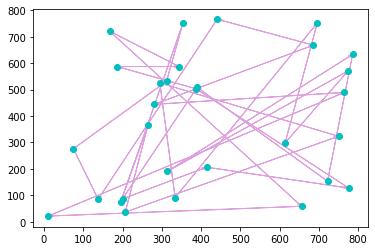

In [3]:
def plotTSP(cities):
    '''
    Inputs:
    - cities : list of cities. ordered by path
    '''
    x = []
    y = []
    for city in cities:
        x.append(city.x)
        y.append(city.y)
    plt.plot(x,y,'co')
    
    a_scale = float(max(x))/float(100)
    plt.arrow(x[-1], y[-1], (x[0] - x[-1]), (y[0] - y[-1]), head_width = a_scale, 
            color ='plum', length_includes_head=True)
    for i in range(0,len(x)-1):
        plt.arrow(x[i], y[i], (x[i+1] - x[i]), (y[i+1] - y[i]), head_width = a_scale,
                color = 'plum', length_includes_head = True)

plotTSP(cities)

complete the following helper functions. a test cases has been given to you to make sure your implement these functions correctly.

In [4]:
# 5 points

def get_distance_between_two_city(c1 : City, c2 : City):
    dist = ((c1.x - c2.x)**2 + (c1.y - c2.y)**2)**(0.5)
    return dist

def get_distance_tsp(cities):
    '''
    Inputs:
    - cities : list of cities of form [c1, c2, ..., cn]. ordered by path
    Output: tsp distance.
    '''
    dist = get_distance_between_two_city(cities[0], cities[-1])
    length = len(cities) - 1
    for city in range(0, length):
        dist = dist + get_distance_between_two_city(cities[city], cities[city+1])
    return dist

# testcase
c1 = City(10, 10)
c2 = City(10, 20)
c3 = City(20, 10)
c4 = City(40, 40)
get_distance_tsp([c1,c2,c3,c4])  # should be around 102.62

102.6240552495637

# Algorithm 1 : Hill Climbing (12 points)

implement a hill climbing algorithm for the problem. you dont have to add sideways move to the hill climbing algorithm. meaning that if a neighbor with a smaller path length does not exist you can terminate and return the existing path as the solution. we define a neighbouring solution as changing the place of two cities. for example if our solution is [c1, c2, c3, c4, c5] then one of the possible next solution would be [c4, c2, c3, c1, c5].   
at each timestep generate all the possible next solution and pick the best one. if one does not exist return the current solution.  

* make sure to use the .copy function when you want to have another copy of a list.
* print the the distance at each iteration of hill climbing

iteration0,distance=12146.060875635472
iteration0,distance=11022.719519550175
iteration0,distance=10230.05206649683
iteration0,distance=9460.979646878135
iteration0,distance=8868.064305269096
iteration0,distance=8411.163234574959
iteration0,distance=7742.969847074456
iteration0,distance=7327.659357018353
iteration0,distance=6705.091256626676
iteration0,distance=6494.949347663913
iteration0,distance=6288.905276532124
iteration0,distance=6174.692603895278
iteration0,distance=6080.006479584697
iteration0,distance=6006.295801674854
iteration0,distance=5942.436672663015
iteration0,distance=5910.176242531406
iteration0,distance=5876.861888649586
iteration0,distance=5842.857591838944
iteration0,distance=5817.718566097552
iteration0,distance=5807.645801404985
iteration0,distance=5790.087101108272
iteration0,distance=5788.260145739844
initial path length=13933.46756985786, path length of hill climbing=5788.260145739844


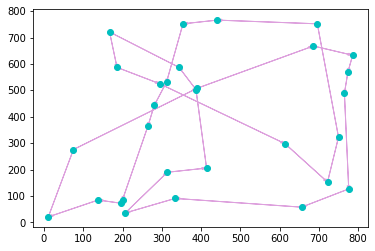

In [5]:
def tsp_hill_climbing(cities):
    
    neighbor_to_go = None
    solution = get_distance_tsp(cities)
    city_length = len(cities)
    count = 0
    for i in range(0, city_length):
        for j in range(i + 1, city_length):
            copy = cities.copy()
            copy[i], copy[j] = copy[j], copy[i]
            current_dist = get_distance_tsp(copy)
            if (current_dist < solution):
                solution = current_dist
                neighbor_to_go = copy.copy()
    
    if (neighbor_to_go is not None):
        print(f'iteration{count},distance={solution}')
        return tsp_hill_climbing(neighbor_to_go)
        count = count + 1
    return cities

solution = tsp_hill_climbing(cities)
print(f'initial path length={get_distance_tsp(cities)}, path length of hill climbing={get_distance_tsp(solution)}')
plotTSP(solution)

# Algorithm 2: Simulated Annealing (13 points)

In this part we will use simulated annealing to solve the tsp problem. In order to generate a random neighbor of a state. choose two cities at random. then flip a fair coin and do one of the following based on the outcome.  
1 - change the position of the two cities (like algorithm 1)  
2 - reverse the cities between these two cities. example : our initial state is [1,2,3,4,5,6] and the two chosen cities are 2 and 5. the resulting neighbor will be [1,5,4,3,2,6] 
we will use exponential decay as a way to schedule the temparture. meaning that in each iteration the temperature is changed to alpha*temperature.    
at each iteration if the neighbour path length is less than the current state we accept that state as our current state. otherwise we will accept it based on the following probability:  
$$p= {e}^{-\frac{\Delta length}{T}}$$
stop the algorithm when temperature is less than a small number. here we will use the variable stopping_temperature for this.

initial path length=13933.46756985786, path length of hill climbing=3750.741117277206


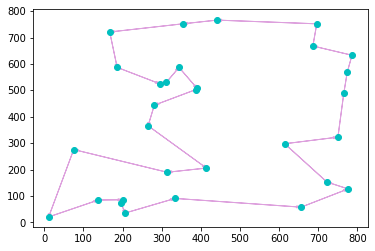

In [6]:
def get_neighbour_state(cities):
    
    length = len(cities)
    first_city = np.random.randint(length)
    second_city = np.random.randint(length)
    
    while first_city == second_city:
        second_city = np.random.randint(len(cities))
        
    neighbor = cities.copy()
    
    choice = np.random.randint(2)
    if choice == 1:
        neighbor[first_city] = cities[second_city]
        neighbor[second_city] = cities[first_city]
    else:
        diff = np.absolute(first_city - second_city) + 1
        bigger = first_city if first_city > second_city else second_city
        smaller = first_city if first_city <= second_city else second_city
            
        for city in range(diff):
            neighbor[smaller + city] = cities[bigger - city]
                
    return neighbor
        
         
def simulated_annealing(cities, T=300, alpha=0.98, stopping_temperature=1e-8):
    
    if T < stopping_temperature:
        return cities
    while(True):
        neighbor = get_neighbour_state(cities)
        curr_dist = get_distance_tsp(cities)
        neighbor_dist = get_distance_tsp(neighbor)
        if curr_dist < neighbor_dist:
            probability_of_action = np.exp((curr_dist-neighbor_dist) / T) # from the given formula
            if np.random.choice(2, p=[probability_of_action, 1 - probability_of_action]) == 0:
                return simulated_annealing(neighbor, T * alpha)
        else:
            return simulated_annealing(neighbor, T * alpha)

solution = simulated_annealing(cities)
print(f'initial path length={get_distance_tsp(cities)}, path length of hill climbing={get_distance_tsp(solution)}')
plotTSP(solution)

# Algorithm 3: genetic algorithm (optional 10 points)

This part is optional and you can earn up to 10 extra point from it. In the theoretical part of this assignment, you created a genetic algorithm for the TSP problem. implement you algotihm here and plot the solution at the end.

initial path length=13933.46756985786, path length of genetic algorithm=6965.498137363083


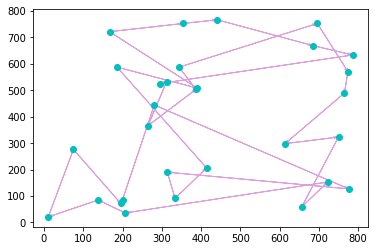

In [29]:
def crossover(first_parent, second_parent):
    length = len(first_parent)
    first_parent_1 = first_parent[int(length / 3):length - int(length / 3)]
    second_parent_1 = second_parent[int(length / 3):length - int(length / 3)]
    child = []
    # put first_parent_1 in child's middle part
    for i in range(0, int(length / 3)):
        if (second_parent[i] not in first_parent_1):
            child.append(second_parent[i])
        else:
            child.append(None)
            
    child.extend(first_parent_1)
    
    for i in range(length - int(length / 3), length):
        if (second_parent[i] not in first_parent_1):
            child.append(second_parent[i])
        else:
            child.append(None)
    
    j = 0
    for i in range(length):
        if child[i] is None:
            while first_parent[j] in child:
                j = j+1
            child[i] = first_parent[j]
            j = j+1
    return child        
            
def mutation(cities):
    to_return = cities.copy()
    length = len(cities)
    i = np.random.randint(length)
    j = np.random.randint(length)
    while i == j:
        j = np.random.randint(length)
    to_return[i], to_return[j] = cities[j], cities[i]
    return to_return

def fit_func(list_of_cities):
    curr_fit = list_of_cities[0]
    curr_dist = get_distance_tsp(list_of_cities[0])
    for cities in list_of_cities:
        dist = get_distance_tsp(cities)
        if dist < curr_dist:
            curr_dist = dist
            curr_fit = cities
    return curr_fit  


def genetic(population, limitation, mutation_probability):
    length = len(population)
    if (limitation == 0):
        return fit_func(population)
    next_generation = []
    for i in range(length):
        list_of_cities = np.random.randint(length, size = 13)
        list_of_lists = []
        for i in list_of_cities:
            list_of_lists.append(population[i])
        first_parent = fit_func(list_of_lists)
        list_of_cities = np.random.randint(length, size = 13)
        list_of_lists = []
        for i in list_of_cities:
            list_of_lists.append(population[i])
        second_parent = fit_func(list_of_lists)
        child = crossover(first_parent, second_parent)
        if np.random.choice(2, p=[mutation_probability, 1 - mutation_probability]) == 0:
            child = mutation(child)
        next_generation.append(child)
    limitation = limitation - 1    
    return genetic(next_generation, limitation, 0.0001)


first_generation = []
for i in range(0 , 447): # 447 can be changed manually to any size for the population
    first_generation.append(np.random.permutation(cities))

solution = genetic(first_generation, 643, 0.0001)
print(f'initial path length={get_distance_tsp(cities)}, path length of genetic algorithm={get_distance_tsp(solution)}')
plotTSP(solution)